In [ ]:
#PROBLEM 2:

#Define noise in images. What are the possible sources of noise?

#In images, noise is random variations in color, or brightness information. It is often produced by bit errors in transmission, analog to digital 
#conversion, or in the case of CMOS technology, it can be produced by the sensor response. 

C:\Users\Carter\AppData\Local\Temp\ipykernel_20084\2683244827.py:41: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(y.flatten(), 256, [0, 256], color='gray')


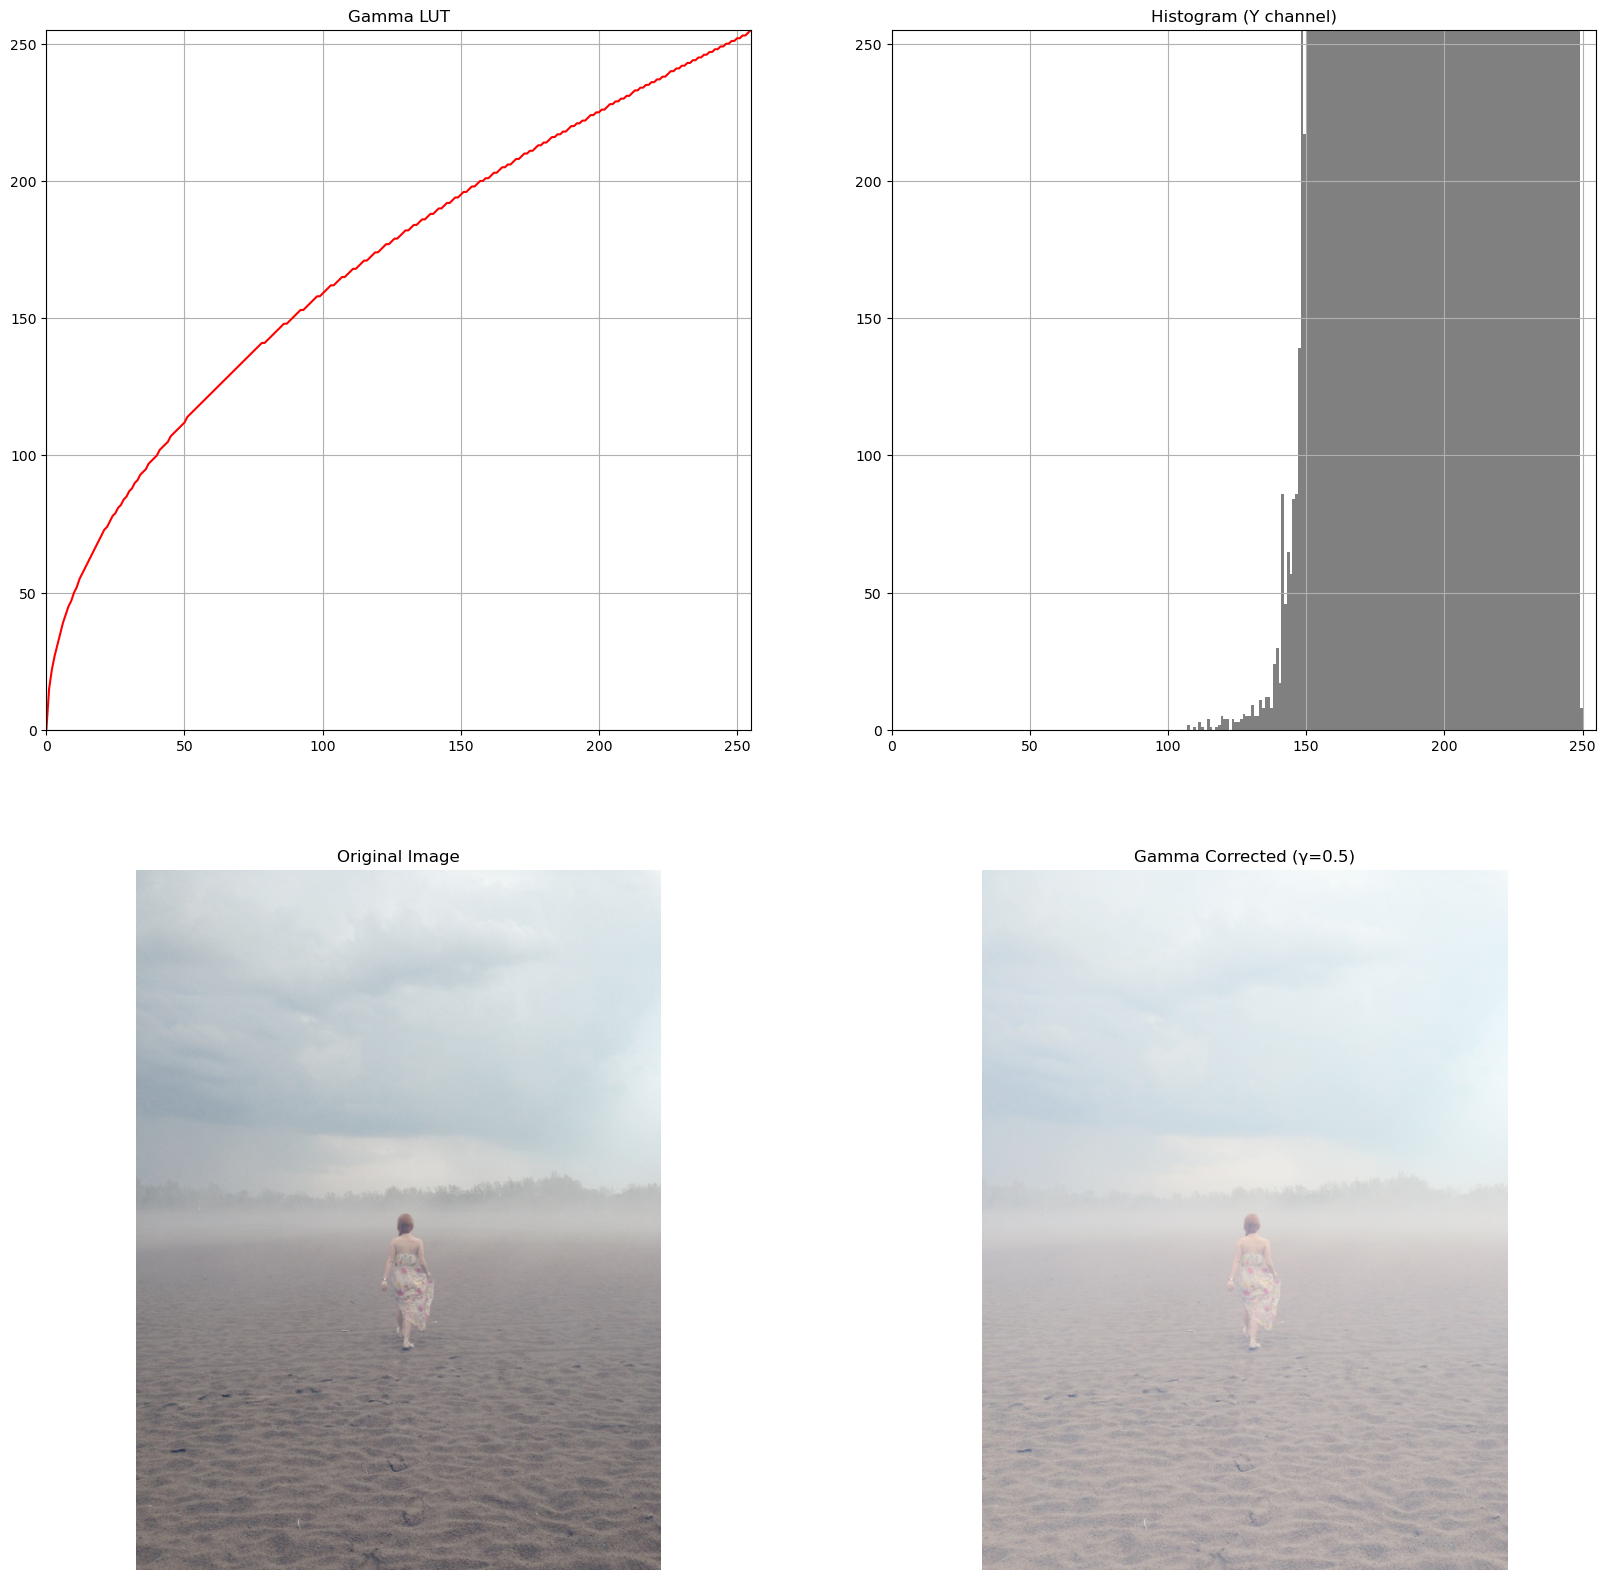

Saved: output_gamma_0_5.jpg


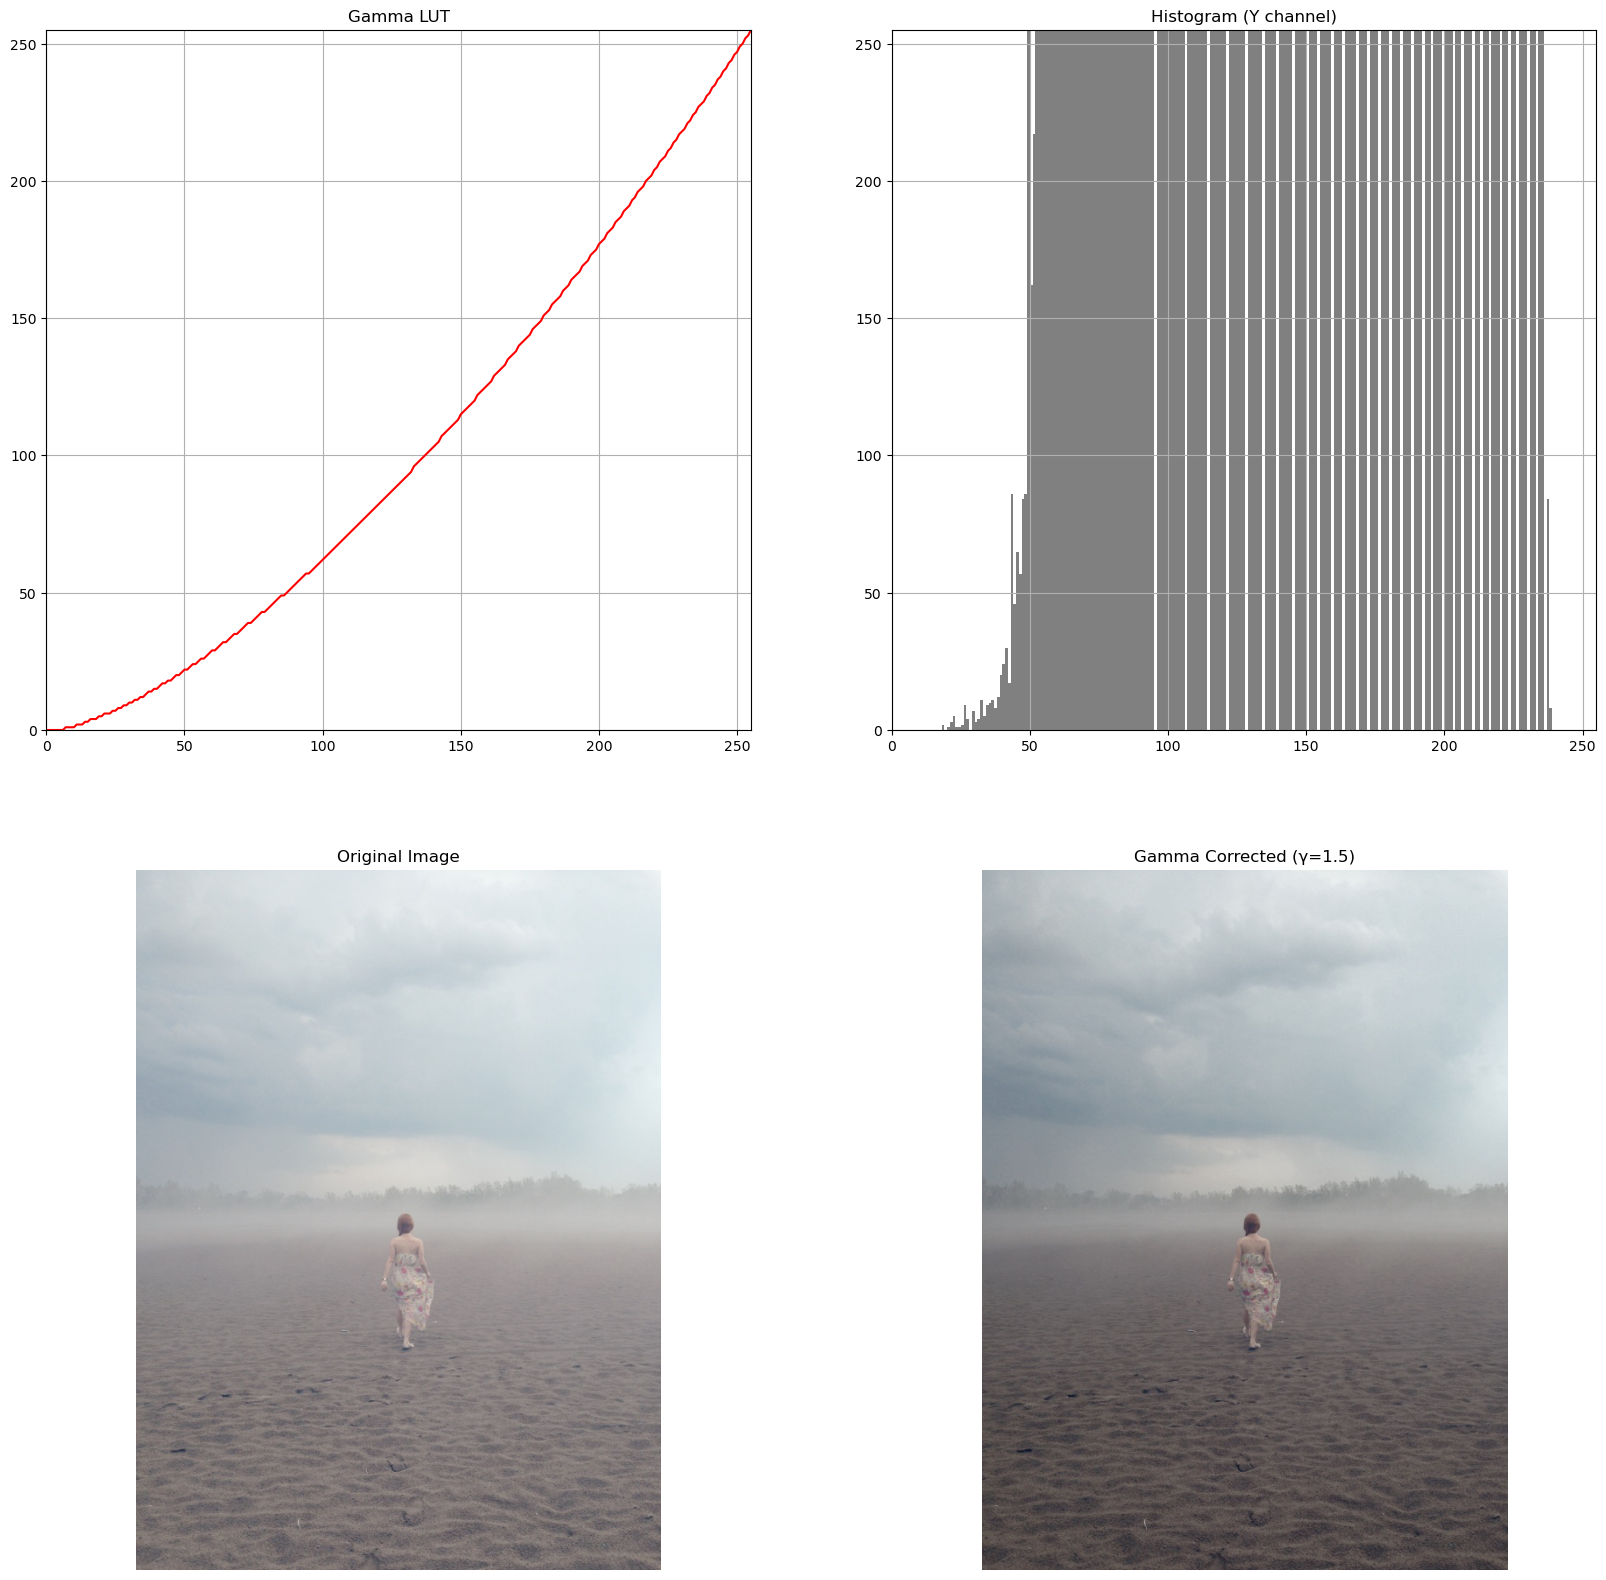

Saved: output_gamma_1_5.jpg


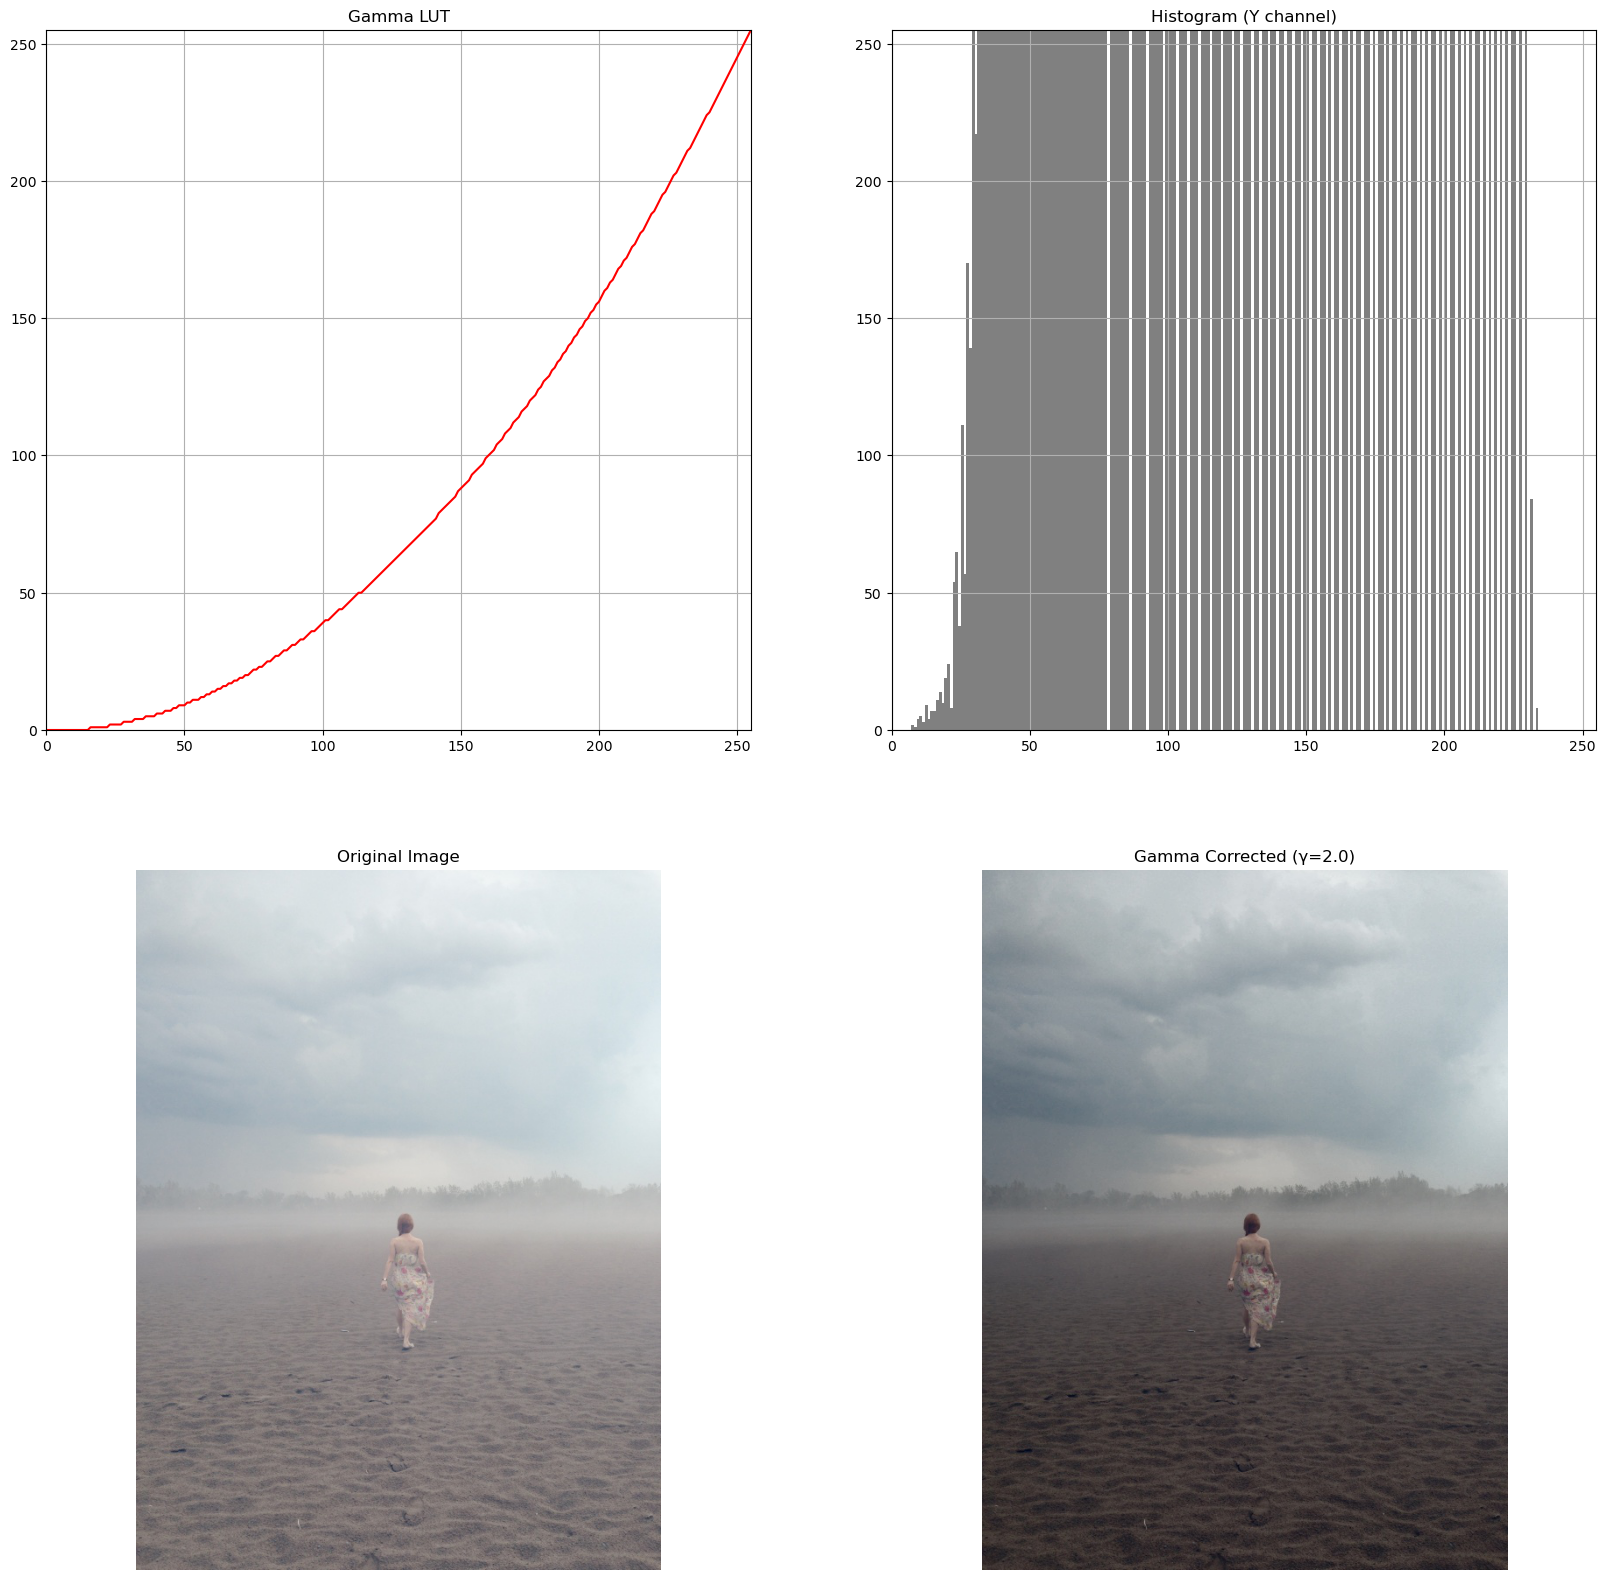

Saved: output_gamma_2_0.jpg


In [8]:
#Problem 3: Implementing Gamma Correction

# Necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interactive, fixed, widgets

matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)

images_path = './images/'   

# Function provided in the template
def lut_chart(image, gamma, verbose=False):
    """Applies gamma correction to an image and shows the result."""
    
    # Transform image to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)

    # Define gamma correction LUT
    lut = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)], dtype=np.uint8)

    # Apply LUT to Y channel
    y = cv2.LUT(y, lut)
    ycrcb = cv2.merge((y, cr, cb))
    out_image = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

    if verbose:
        # Plot used LUT
        plt.subplot(2, 2, 1)
        plt.plot(lut, color='r')
        plt.title('Gamma LUT')
        plt.xlim([0, 255])
        plt.ylim([0, 255])
        plt.grid()

        # Plot histogram of Y channel
        plt.subplot(2, 2, 2)
        plt.hist(y.flatten(), 256, [0, 256], color='gray')
        plt.title('Histogram (Y channel)')
        plt.xlim([0, 255])
        plt.ylim([0, 255])
        plt.grid()

        # Show original image
        plt.subplot(2, 2, 3)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        # Show gamma corrected image
        plt.subplot(2, 2, 4)
        plt.imshow(cv2.cvtColor(out_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Gamma Corrected (γ={gamma})')
        plt.axis('off')

        plt.show()

    return out_image


# ======================
# MAIN USAGE EXAMPLE
# ======================
if __name__ == "__main__":
    # >>> INSERT YOUR IMAGE PATH HERE <<<
    # Use raw string or forward slashes
    image_path = r"C:\Users\Carter\Downloads\gamma_2.jpeg"

    # Load image
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        raise FileNotFoundError(f"Could not read image from {image_path}")

    # Try different gamma values
    gamma_values = [0.5, 1.5, 2.0]

    for g in gamma_values:
        out_img = lut_chart(img, g, verbose=True)

        # Save the gamma corrected image
        out_name = f"output_gamma_{str(g).replace('.', '_')}.jpg"
        cv2.imwrite(out_name, out_img)
        print(f"Saved: {out_name}")

#Based on the three different image outputs, output 2 (gamma correction value 1.5) produces the best looking image. Gamma output 0.5 makes the fog 
#appear heavier, obscuring the woman in the center (especially on the lighter sections on her, her skin, and the white of her dress.) and nearly hiding
#the shadow of tree's in the background. Output 3 (gamma correction value 2.0) Makes the image noticeably darker, making the sand an intenser shade of 
#brown, the clouds blacker, and the reds on the woman (her hair, the pattern on her dress) an intenser shade of red. The fog looks like it has 
#dissapated. Output 2 (Gamma correction value 1.5) stikes a good balance between color intensities, dissipating the fog without outright removing it,
#while making the brighter colors stand out more.

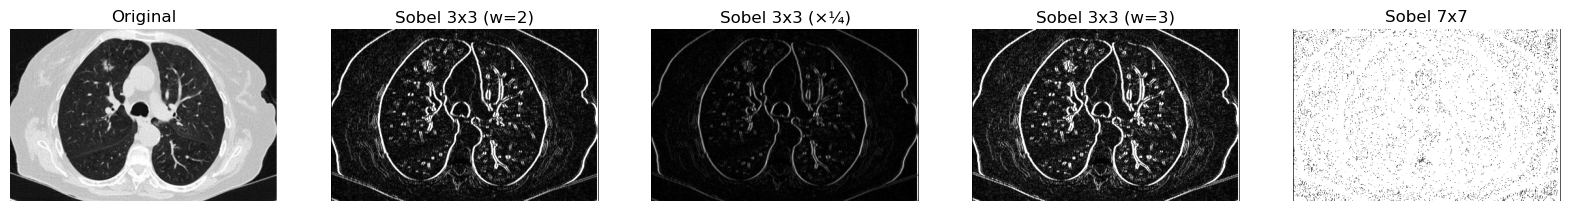

In [7]:
#Problem 4. Edge detection



import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- Load image ---
p = Path(r"C:\Users\Carter\medical_3.jpg")
img = cv2.imread(str(p), cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f"Could not read {p}")

# --- Define Sobel kernels ---
# Base Sobel (3x3, weight=2)
sobel_standard = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]], dtype=np.float32)

# Sobel scaled by 1/4
sobel_scaled = sobel_standard * 0.25

# Sobel with weight changed from 2 -> 3
sobel_weight3 = np.array([[-1, 0, 1],
                          [-3, 0, 3],
                          [-1, 0, 1]], dtype=np.float32)

# --- Apply convolutions ---
conv_standard = cv2.filter2D(img.astype(np.float32), -1, sobel_standard)
conv_scaled   = cv2.filter2D(img.astype(np.float32), -1, sobel_scaled)
conv_weight3  = cv2.filter2D(img.astype(np.float32), -1, sobel_weight3)

# 7x7 Sobel using OpenCV (larger kernel)
conv_large = cv2.Sobel(img, cv2.CV_32F, dx=1, dy=0, ksize=7)

# --- Convert results to displayable format ---
conv_standard_disp = cv2.convertScaleAbs(conv_standard)
conv_scaled_disp   = cv2.convertScaleAbs(conv_scaled)
conv_weight3_disp  = cv2.convertScaleAbs(conv_weight3)
conv_large_disp    = cv2.convertScaleAbs(conv_large)

# --- Show results (1x5 grid) ---
plt.figure(figsize=(20,4))
plt.subplot(1,5,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,5,2); plt.imshow(conv_standard_disp, cmap='gray'); plt.title('Sobel 3x3 (w=2)'); plt.axis('off')
plt.subplot(1,5,3); plt.imshow(conv_scaled_disp, cmap='gray'); plt.title('Sobel 3x3 (×¼)'); plt.axis('off')
plt.subplot(1,5,4); plt.imshow(conv_weight3_disp, cmap='gray'); plt.title('Sobel 3x3 (w=3)'); plt.axis('off')
plt.subplot(1,5,5); plt.imshow(conv_large_disp, cmap='gray'); plt.title('Sobel 7x7'); plt.axis('off')
plt.show()

# Problem 4.1: Normalization Factor

#Applying a factor (in this case 1/4) to the original sobel has made the weaker edges in the image harder to detect. While edges and outlines that were 
#strong in the original image, such as the outlines of the (what I believe are lungs) are still clearly visible, the weaker outlines in the original 
#image such as the structures on the inside of the lungs while still visible, are not nearly as pronounced, with some of them being near invisible. 
#The clarity/intensity has been greatly diminished. 

#Problem 4.2: Smoothing Strength (kernel weights)

#Increasing the kernels weight from two to three has had the opposite effect from the previous problem. Where scaling the original sobel by a factor 
#(1/4) made the edges and outlines duller, increasing the kernels weight from two to three has made all edges and outlines much more intense. the 
#previously duifficult to see outlines on the interior of the organ are now much more pronounced.

#Problem 4.3: Kernel Size

#Increasing the kernels size by more than twice it's original dimensions (7x7) has made the x-ray into a noisy indistinguishable mess. The barest
#trace of the original outline is visible through the noise and that is about it 

#Conclusion: Out of all of the outputs of the original image, the sobel with the weight increased by 3 is easily the most useful to anyone attempting
#to extract useful medical information out of the original x-ray. Followed by the original sobel. While the original sobel is useful for 
#detecting edges within the original x-ray, there are still many sections that are faded, or are up to scrutiny. The sobel with the weights increased 
#to three, however, leaves little to the imagination. All outlines are intensified to the point of clear visibility. 